<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tarantino.csv')
df = data.copy()

In [3]:
df.head(10)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
5,Reservoir Dogs,word,fuck,0.66
6,Reservoir Dogs,word,shit,0.90
7,Reservoir Dogs,word,fuck,1.43
8,Reservoir Dogs,word,dicks,1.56
9,Reservoir Dogs,word,fuck,1.66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [5]:
df.describe(include='object')['type']

,type
count,1894
unique,2
top,word
freq,1704


##Число проклятий, летальных исходов и их соотношение по фильмам

In [6]:
df['type'].value_counts()

,count
type,
word,1704
death,190


In [7]:
df.groupby('movie')['type'].value_counts()

movie                type 
Django Unchained     word     262
                     death     47
Inglorious Basterds  word      58
                     death     48
Jackie Brown         word     368
                     death      4
Kill Bill: Vol. 1    death     63
                     word      57
Kill Bill: Vol. 2    word      69
                     death     11
Pulp Fiction         word     469
                     death      7
Reservoir Dogs       word     421
                     death     10
Name: count, dtype: int64

##Частота употребления конкретных проклятий

In [8]:
df[df['type']=='word']['word'].value_counts()

,count
word,
fucking,407
shit,221
fuck,213
n-word,179
ass,140
goddamn,113
motherfucker,70
bitch,64
hell,45


In [9]:
df_words = df[df['type']=='word']
word_count = df_words['word'].value_counts(normalize=True)*100
word_count

,proportion
word,
fucking,23.884977
shit,12.969484
fuck,12.500000
n-word,10.504695
ass,8.215962
goddamn,6.631455
motherfucker,4.107981
bitch,3.755869
hell,2.640845


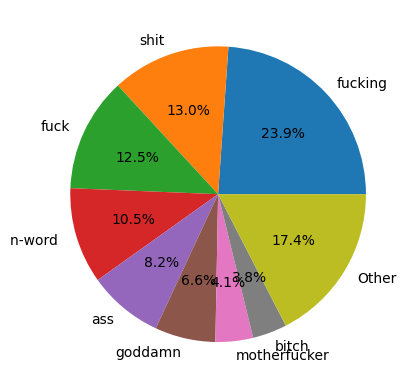

In [10]:
#Фильтруем только те слова процент которых превышает фикс. значение
threshold = 3
filtered_word_count = word_count[word_count > threshold]
filtered_word_count['Other'] = word_count[word_count <= threshold].sum()



labels = filtered_word_count.index
plt.pie(filtered_word_count, labels=labels, autopct='%1.1f%%')

plt.show()

##Распределение времени между проклятиями

In [11]:
df_words = df_words.sort_values(by='minutes_in')

#Переводим в секунды
time_seconds = df_words['minutes_in']*60

#Вычисляем разницу в секундых
time_diffs_seconds = time_seconds.diff()
time_diffs_seconds.describe()

,minutes_in
count,1703.000000
mean,5.632883
std,11.061087
min,0.000000
25%,1.200000
50%,3.000000
75%,6.000000
max,297.000000


Как мы видим, данные имеют очень большой разброс, среднее и медианы сильно различаются, что может свидетельствовать о выбросах.

5.632883147386964


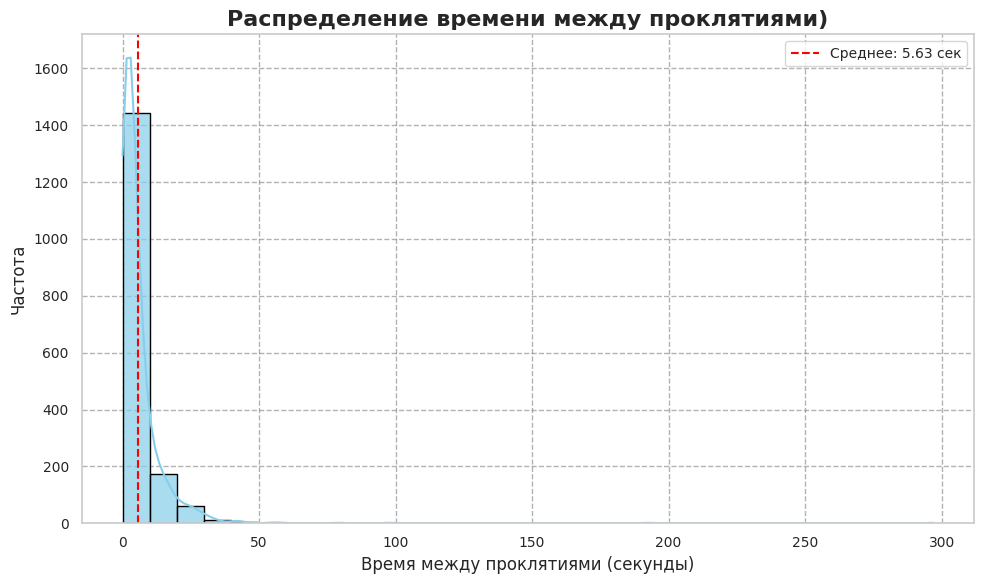

In [12]:
sns.set_theme(style="whitegrid")

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(
    time_diffs_seconds, bins=30, color="skyblue", kde=True, edgecolor="black", alpha=0.7
)

plt.title("Распределение времени между проклятиями)", fontsize=16, fontweight='bold')
plt.xlabel("Время между проклятиями (секунды)", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.grid(visible=True, which="major", color="gray", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

mean_value = time_diffs_seconds.mean()
print(mean_value)
plt.axvline(mean_value, color="red", linestyle="--", linewidth=1.5, label=f"Среднее: {mean_value:.2f} сек")
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


Ограничим данные 99 процентилем

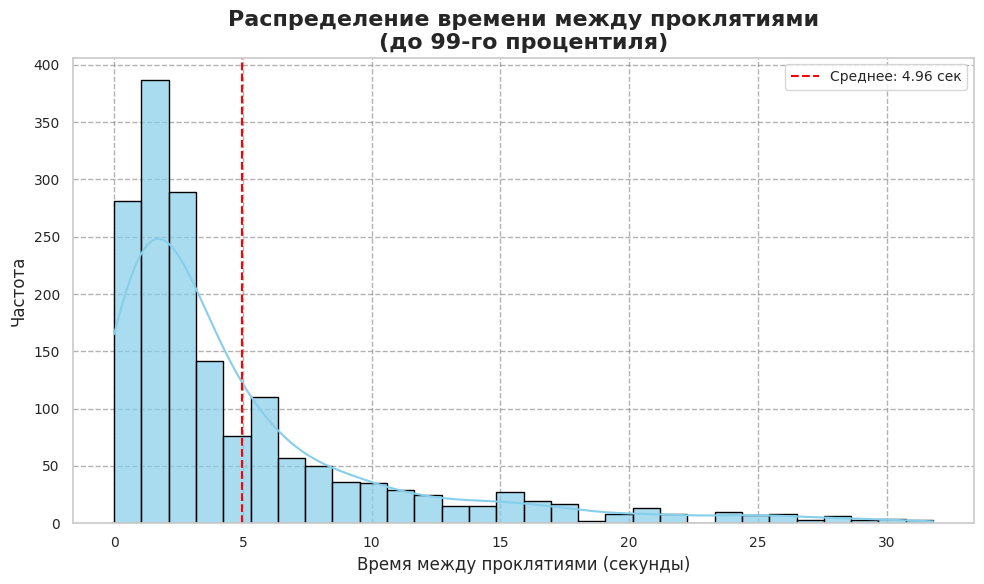

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Ограничиваем временные интервалы до 99-го процентиля
filtered_diffs = time_diffs_seconds[time_diffs_seconds <= time_diffs_seconds.quantile(0.99)]

plt.figure(figsize=(10, 6))  # Увеличиваем размер графика
sns.histplot(
    filtered_diffs, bins=30, color="skyblue", kde=True, edgecolor="black", alpha=0.7
)

plt.title("Распределение времени между проклятиями\n(до 99-го процентиля)", fontsize=16, fontweight='bold')
plt.xlabel("Время между проклятиями (секунды)", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.grid(visible=True, which="major", color="gray", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

mean_value = filtered_diffs.mean()
plt.axvline(mean_value, color="red", linestyle="--", linewidth=1.5, label=f"Среднее: {mean_value:.2f} сек")
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


Ограничим данные 95 процентилем

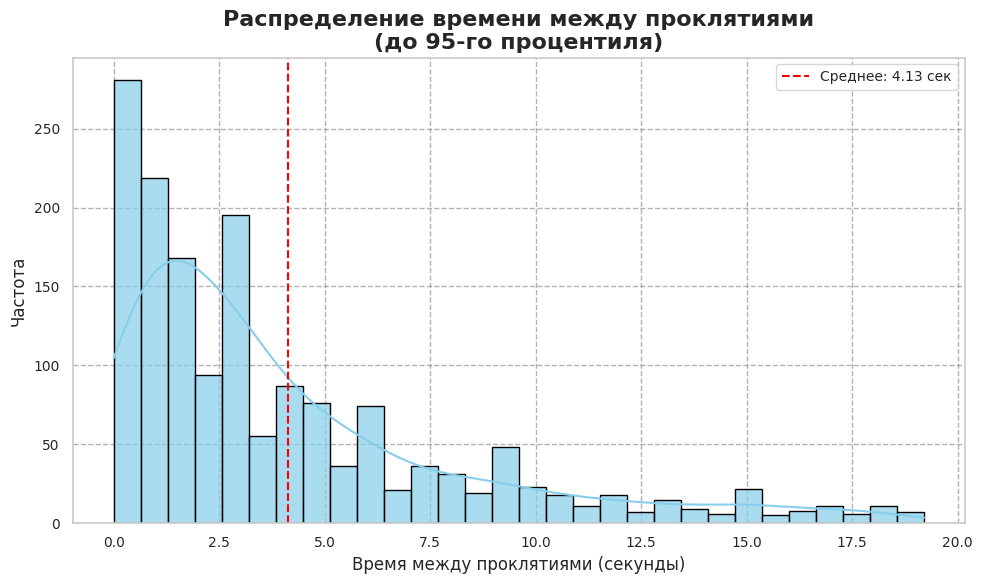

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Ограничиваем временные интервалы до 95-го процентиля
filtered_diffs = time_diffs_seconds[time_diffs_seconds <= time_diffs_seconds.quantile(0.95)]

plt.figure(figsize=(10, 6))  # Увеличиваем размер графика
sns.histplot(
    filtered_diffs, bins=30, color="skyblue", kde=True, edgecolor="black", alpha=0.7
)

plt.title("Распределение времени между проклятиями\n(до 95-го процентиля)", fontsize=16, fontweight='bold')
plt.xlabel("Время между проклятиями (секунды)", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.grid(visible=True, which="major", color="gray", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

mean_value = filtered_diffs.mean()
plt.axvline(mean_value, color="red", linestyle="--", linewidth=1.5, label=f"Среднее: {mean_value:.2f} сек")
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()
